*Importing the nifty dataset*

In [ ]:
from google.colab import files

# Upload a file and store it in the variable 'uploaded'
uploaded = files.upload()

# Get the file path
file_path = list(uploaded.keys())[0]
print("File path:", file_path)


Saving nifty_data.csv to nifty_data.csv
File path: nifty_data.csv


**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

*Reading the data into the notebook environment*

In [ ]:
nifty_50_df = pd.read_csv("nifty_data.csv", index_col='Date', parse_dates=['Date'])
nifty_bank_df = pd.read_csv("nifty_data.csv", index_col='Date', parse_dates=['Date'])

nifty_50_df.head(5)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,1.914630e+10,26.25,4.69,0.94


*Display the last 5 records*


In [ ]:
nifty_50_df.tail(5)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2021-07-01,15755.05,15755.55,15667.05,15680.00,224921644,1.735997e+11,28.26,4.23,1.27
2021-07-02,15705.85,15738.35,15635.95,15722.20,254808999,1.801542e+11,28.33,4.24,1.23
2021-07-05,15793.40,15845.95,15762.05,15834.35,207032153,1.497654e+11,28.53,4.27,1.23
2021-07-06,15813.75,15914.20,15801.00,15818.25,391410742,2.445605e+11,28.50,4.26,1.10
2021-07-07,15819.60,15893.55,15779.70,15879.65,329308646,2.225996e+11,28.62,4.28,1.10


*Remove missing values*

In [ ]:
nifty_50_df = nifty_50_df.fillna(method='ffill')
nifty_bank_df = nifty_bank_df.fillna(method='ffill')

*Data Visualization*

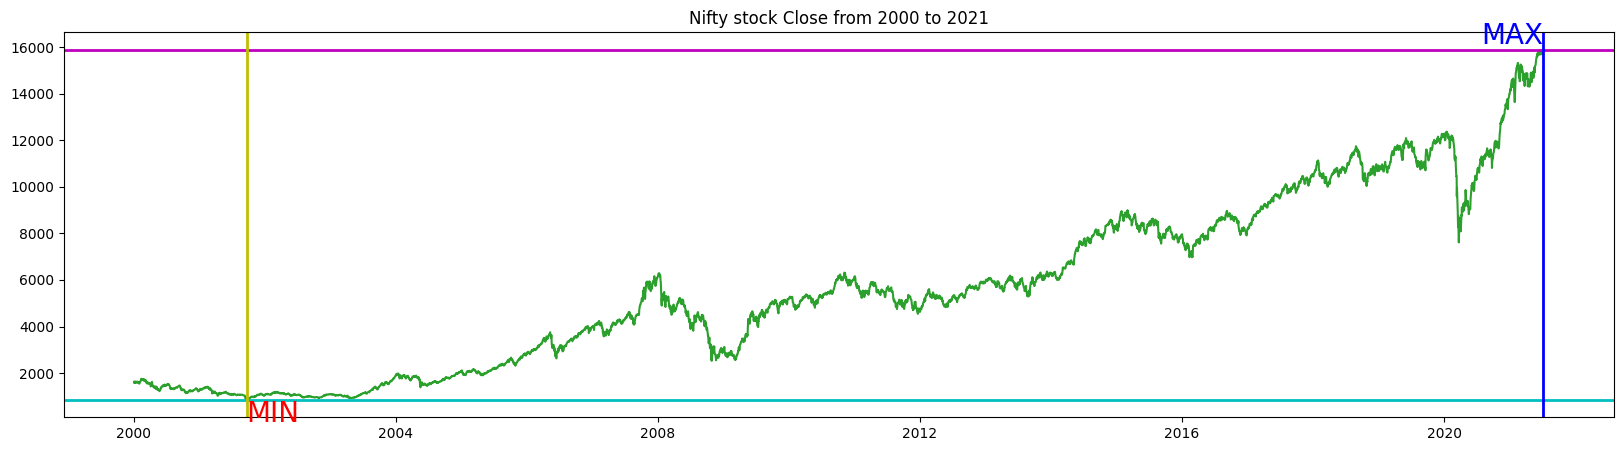

Max Value :   15879.65
Min Value :   854.2


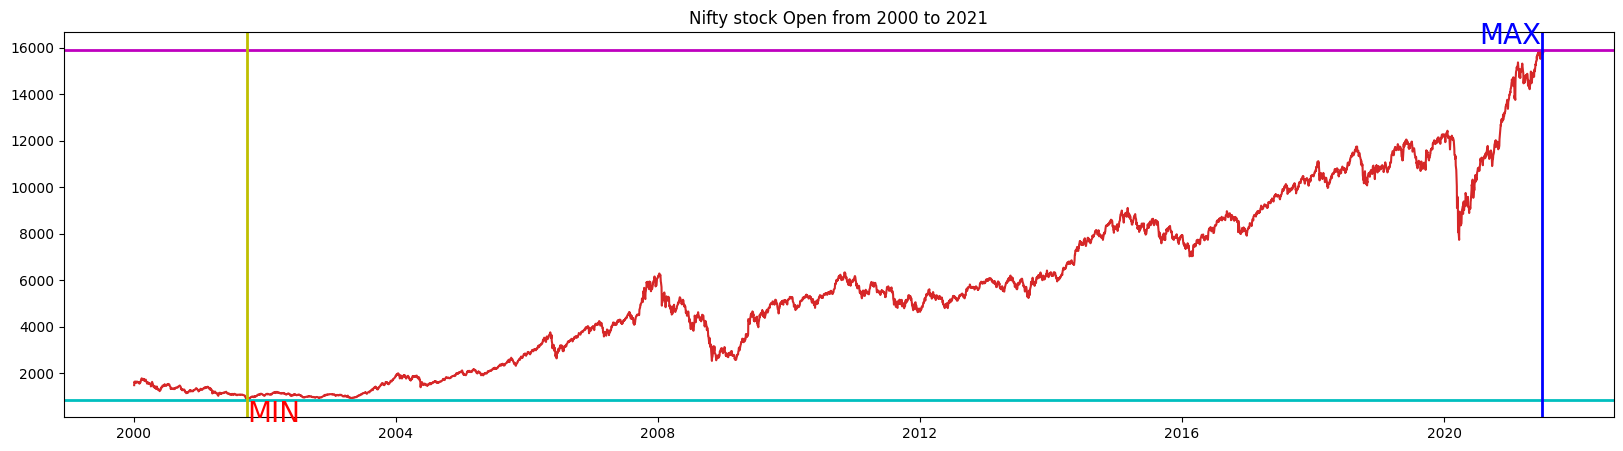

Max Value :   15915.35
Min Value :   853.0


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
def plot_attribute(df, attritube ,start='2000', end='2021',color ='Green'):
    fig, ax = plt.subplots(1, figsize=(20,5))
    ax.plot(df[start:end].index, df[start:end][attritube],'tab:{}'.format(color))
    ax.set_title("Nifty stock {} from 2000 to 2021".format(attritube))

    ax.axhline(y=df[start:end].describe()[attritube]["max"],linewidth=2, color='m')
    ax.axhline(y=df[start:end].describe()[attritube]["min"],linewidth=2, color='c')
    ax.axvline(x=df[attritube].idxmax(),linewidth=2, color='b')
    ax.axvline(x=df[attritube].idxmin() ,linewidth=2, color='y')

    ax.text(x=df[attritube].idxmax(),
            y=df[start:end].describe()[attritube]["max"],
            s='MAX',
            horizontalalignment='right',
            verticalalignment='bottom',
            color='blue',
            fontsize=20)

    ax.text(x=df[attritube].idxmin(),
            y=df[start:end].describe()[attritube]["min"],
            s='MIN',
            horizontalalignment='left',
            verticalalignment='top',
            color='red',
            fontsize=20)

    plt.show()
    print("Max Value :  ",df[start:end].describe()[attritube]["max"])
    print("Min Value :  ",df[start:end].describe()[attritube]["min"])

plot_attribute(nifty_50_df,"Close",color='Green')
plot_attribute(nifty_50_df,"Open",color='Red')

*Nifty Index Price Visualization Close in Green and Open in Red*

Text(0.5, 1.0, 'Nifty Stock Open from 2000 to 2021')

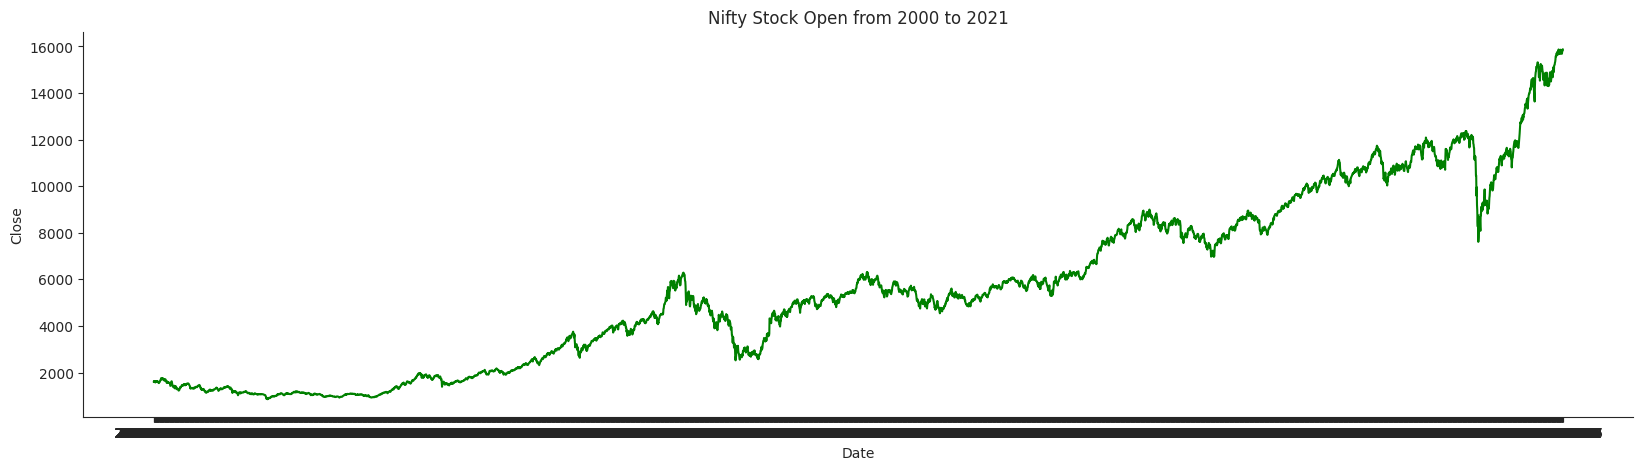

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set
import matplotlib.pyplot as plt

nifty_50_df = pd.read_csv('/NIFTY 50 k.csv')

plt.figure(figsize=(20,5))
sns.set_style("ticks")
sns.lineplot(data=nifty_50_df, x="Date", y='Close', color='Green')
sns.despine()
plt.title("Nifty Stock Open from 2000 to 2021")


*Nifty Bank Open Price visualization*

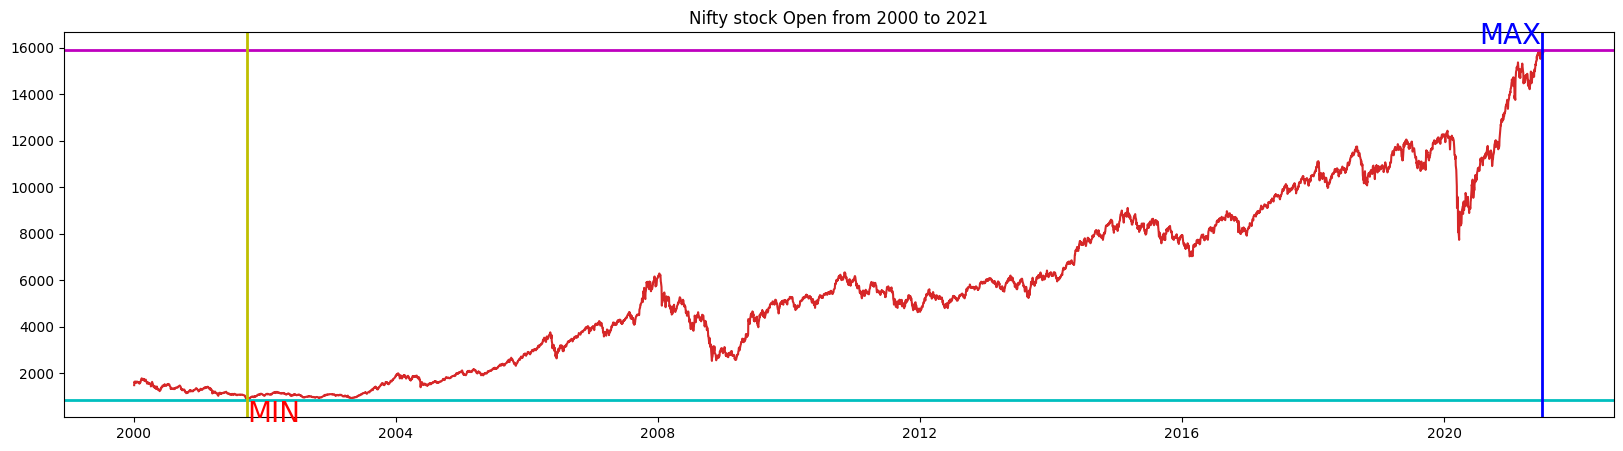

Max Value :   15915.35
Min Value :   853.0


In [ ]:
plot_attribute(nifty_bank_df,"Open",color='red')

*Nifty Bank high price visualization*

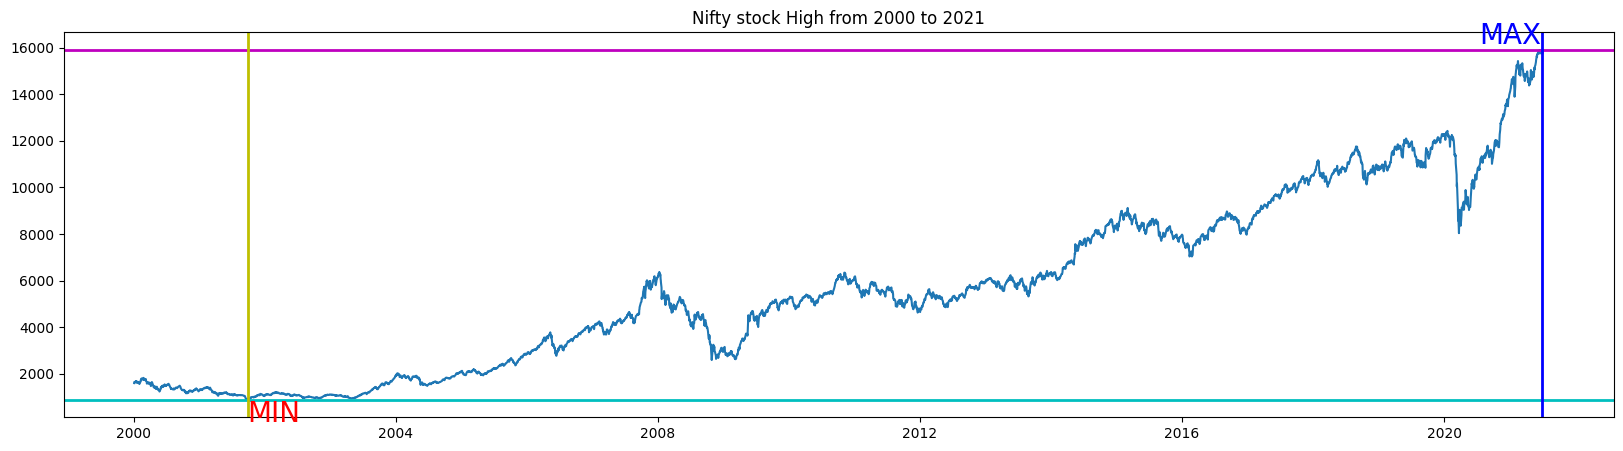

Max Value :   15915.65
Min Value :   877.0


In [ ]:
plot_attribute(nifty_bank_df,"High",color='blue')

*Nifty Bank low price visualization*

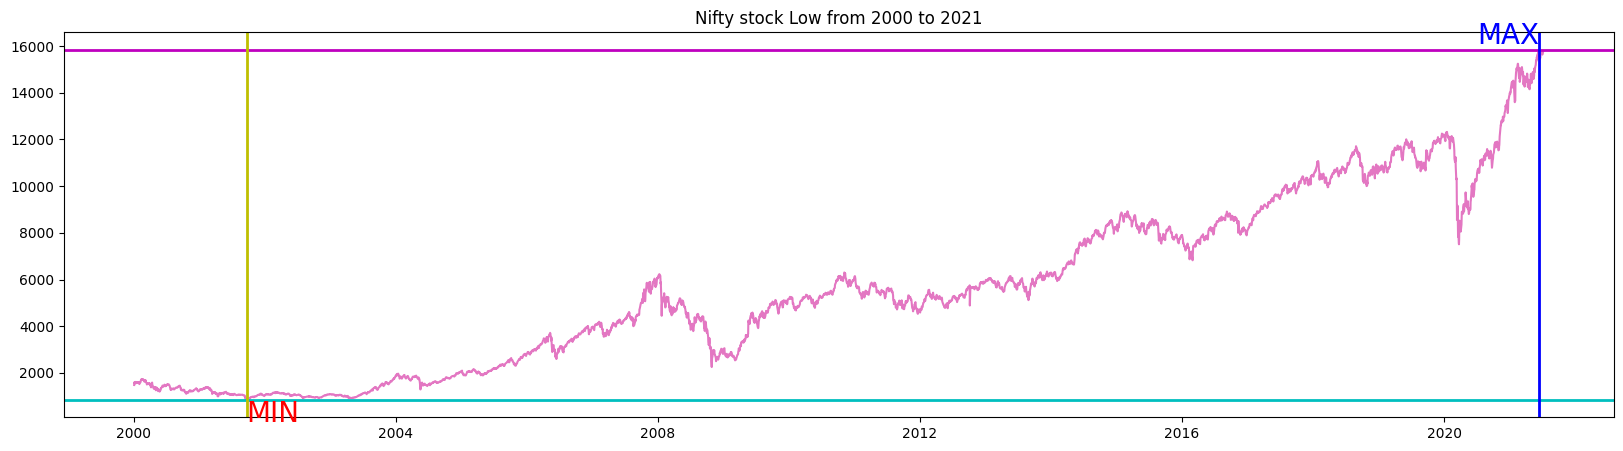

Max Value :   15842.4
Min Value :   849.95


In [ ]:
plot_attribute(nifty_bank_df,"Low",color='Pink')

*Combined Time Series Plot*

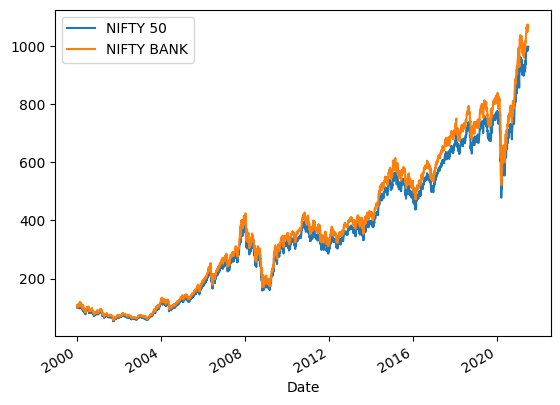

In [ ]:
normalised_nifty_50_df = nifty_50_df["Close"].div(nifty_50_df["Close"].iloc[0]).mul(100)
normalised_nifty_bank_df = nifty_bank_df["Open"].div(nifty_bank_df['Open'].iloc[0]).mul(100)
normalised_nifty_50_df.plot()
normalised_nifty_bank_df.plot()
plt.legend(['NIFTY 50','NIFTY BANK'])
plt.show()

*Model Testing and Training*

In [ ]:
train_data = nifty_50_df["Close"]["2018":"4-15-2020"]
test_data =  nifty_50_df["Close"]["4-15-2020":]

*AIC and BIC model Criterion*

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import statsmodels.formula.api as smf

df = pd.read_csv('/NIFTY 50 k.csv')

train_data = df["Open"]
test_data = df["Close"]

AIC = np.arange(5)
BIC = np.arange(5)

p = d = q = range(0, 5)
columns=['p','d','q','P', 'D', 'Q', 's','AIC','BIC']

def get_score(test_data, p, d, q, AIC, BIC):
   return test_data, p, d, q, AIC, BIC

dk = pd.DataFrame([get_score(test_data, p, d, q, AIC, BIC) for k in range(0, 5)], columns=['test_data', 'p','d','q','AIC','BIC'])

aic_bic = pd.DataFrame(columns=['p','d','q','AIC','BIC'])
aic_bic_df = pd.DataFrame(aic_bic, columns=['p','d','q','AIC','BIC'])
aic_bic_sorted_aic = aic_bic_df.sort_values('AIC')[:5]
print(aic_bic_sorted_aic)
print (AIC)

aic_bic_sorted_bic = aic_bic_df.sort_values('BIC')[:5]
print(aic_bic_sorted_bic)
print(BIC)


Empty DataFrame
Columns: [p, d, q, AIC, BIC]
Index: []
[0 1 2 3 4]
Empty DataFrame
Columns: [p, d, q, AIC, BIC]
Index: []
[0 1 2 3 4]


In [ ]:
import pandas as pd

df = pd.read_csv('/NIFTY 50 k.csv')

order_aic_bic =

*SARIMAX LIBRARIES*

In [ ]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
nifty_50_df = pd.read_csv("/NIFTY 50 k.csv")
test_data =  nifty_50_df.iloc[:,5046:5354]

print(len(test_data))
print(test_data.index)

5353
RangeIndex(start=0, stop=5353, step=1)


In [ ]:
test_data = test_data.squeeze()


In [ ]:
test_data = test_data.squeeze()


*SARIMAX model*

In [ ]:
model = SARIMAX(train_data, order=(5,1,2))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
mae = np.mean(np.abs(results.resid))

print(mae)

102.14464589527769


*SARIMA MODEL DIAGNOSTICS*

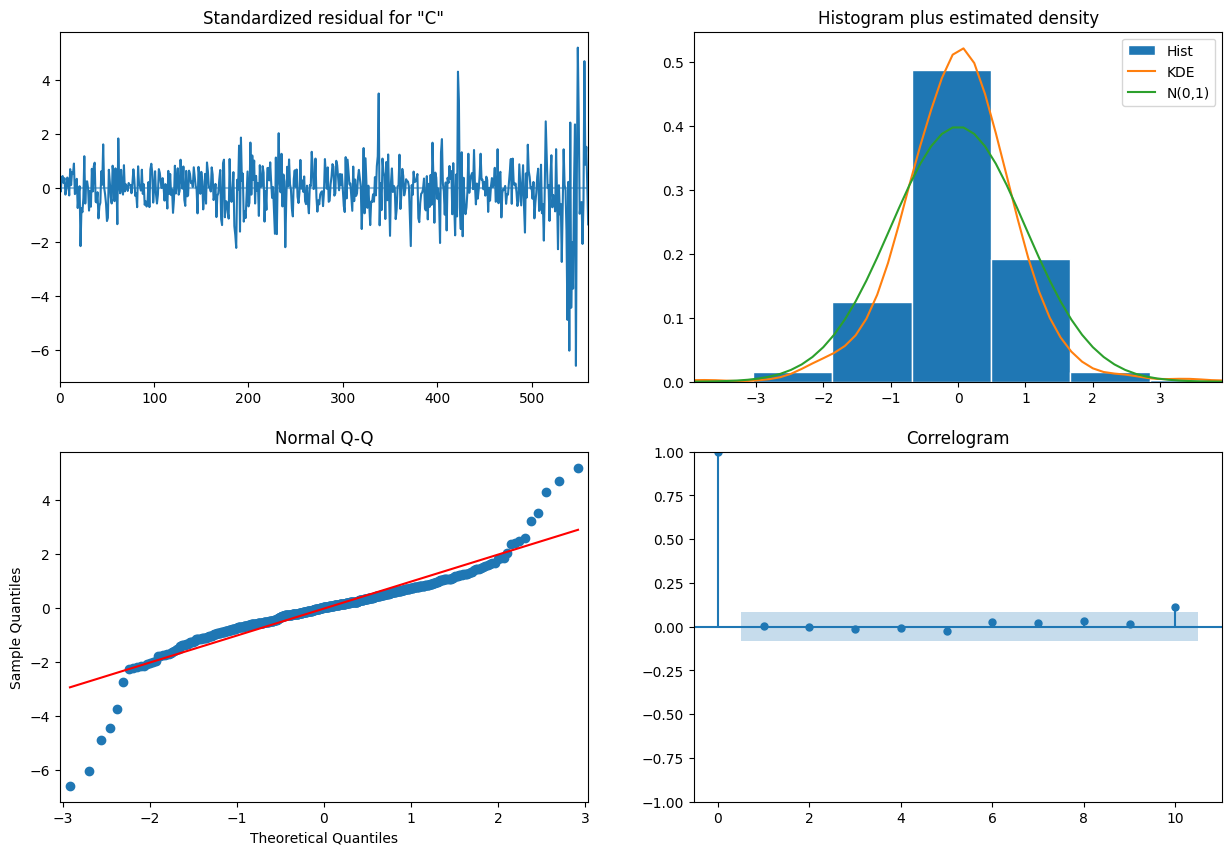

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
results.plot_diagnostics()
plt.show()

In [ ]:
prediction = results.get_prediction(start="7-2019")

In [ ]:
predictedmean = prediction.predicted_mean
p_bounds = prediction.conf_int()
p_lower_limit = p_bounds.iloc[:,0]
p_upper_limit = p_bounds.iloc[:,1]


In [ ]:
forecast = results.get_forecast(steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
mean_forecast = forecast.predicted_mean
f_bounds = forecast.conf_int()
f_lower_limit = f_bounds.iloc[:,0]
f_upper_limit = f_bounds.iloc[:,1]

*Visualize predicted results for SARIMA model*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your Nifty 50 dataset
# Assuming 'Date' is your datetime index and 'Close' is the closing prices
df = pd.read_csv('nifty_data.csv', parse_dates=['Date'], index_col='Date')

# Assuming you already have the best parameters based on AIC or BIC
(p, d, q), (P, D, Q, s) = best_params_aic  # or best_params_bic

# Fit SARIMA model using the best parameters
model = SARIMAX(df['Close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
result = model.fit()

# Make predictions for the entire dataset
predictions = result.get_prediction(start=df.index[0], end=df.index[-1], dynamic=False)

# Extract the predicted mean values and confidence intervals
predicted_mean = predictions.predicted_mean
confidence_interval = predictions.conf_int()

# Plotting the actual values and the predicted values with confidence interval
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Actual Values', color='blue')
plt.plot(predicted_mean, label='Predicted Values', color='red')
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='pink', alpha=0.3)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.title('SARIMA Model - Actual vs Predicted')
plt.legend()
plt.show()


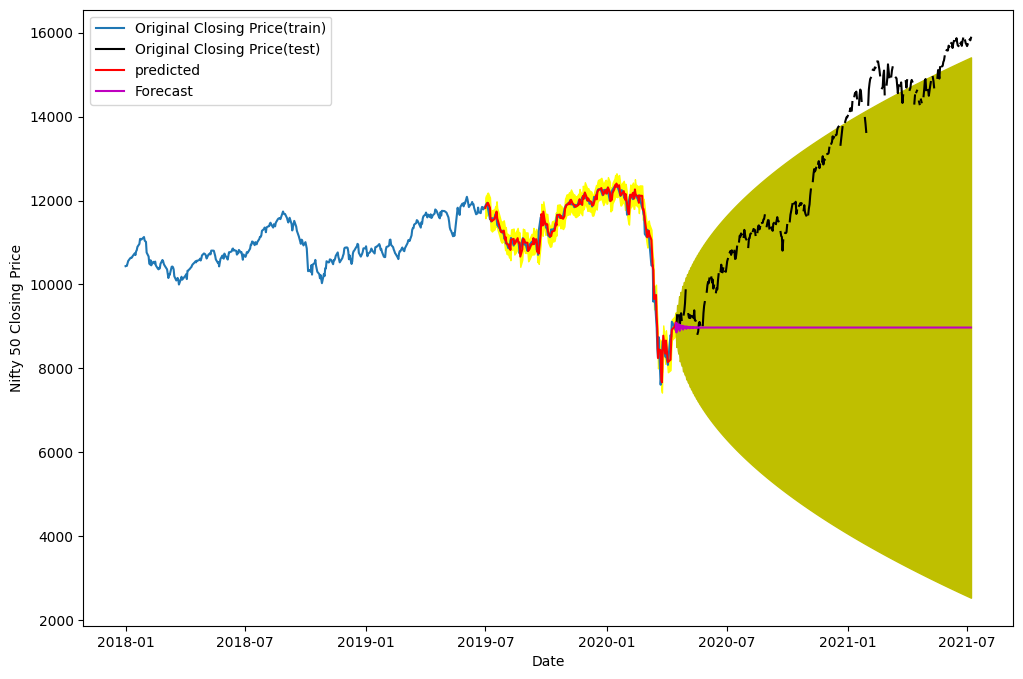

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv('/NIFTY 50 k.csv', parse_dates=['Date'], index_col='Date')

plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data, label='Original Closing Price(train)')
plt.plot(test_data.index, test_data, label='Original Closing Price(test)',color='k')

plt.plot(predictedmean.index, predictedmean, color='r', label='predicted')
plt.plot(test_data.index, mean_forecast, color='m', label='Forecast')

plt.fill_between(predictedmean.index,p_lower_limit,p_upper_limit, color='yellow')
plt.fill_between(test_data.index,f_lower_limit,f_upper_limit, color='y')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()

***Accuracy of the SARIMA Model***

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Accuracy is: 1.0


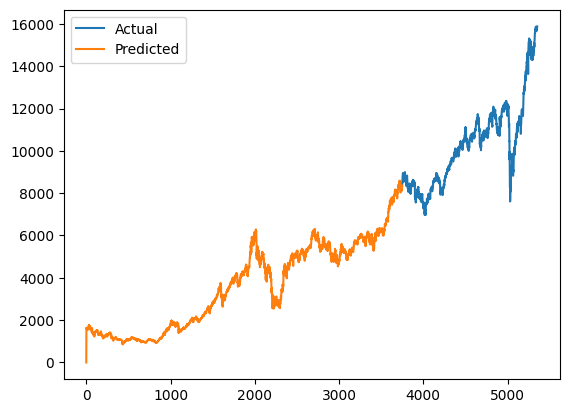

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
df = pd.read_csv('/NIFTY 50 k.csv')

# Define data
y = df['Close']
X = df[['Volume']]

# Split into train and test
y_train, y_test = train_test_split(y, test_size=0.3, shuffle=False)
X_train, X_test = train_test_split(X, test_size=0.3, shuffle=False)

# Build SARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(2,1,1))
fitted = model.fit(disp=-1)

# Forecast on test data
y_pred = fitted.predict(exog=X_test)

cutoff = 0.7
y_pred_classes = np.zeros_like(y_pred)
y_test_classes = np.zeros_like(y_pred)

accuracy = accuracy_score(y_test_classes, y_pred_classess)
print('Accuracy is:', accuracy)

# Plot actual and predicted
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

*Linear Regression*

MSE: 729.3767074113964
RMSE: 27.006975162194607
R-squared: 0.9999468645312017
Coefficients: [-5.72940447e-01  8.54644536e-01  7.18769529e-01 -1.34339245e-08]
MSE: 729.3767074113964
MAE: 16.53944142708375
Coefficients: [-5.72940447e-01  8.54644536e-01  7.18769529e-01 -1.34339245e-08]


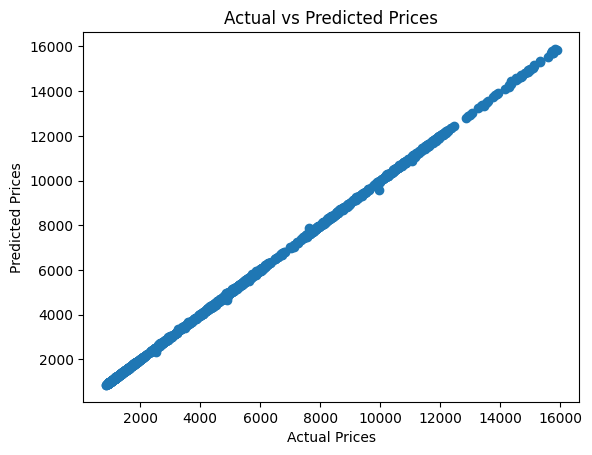

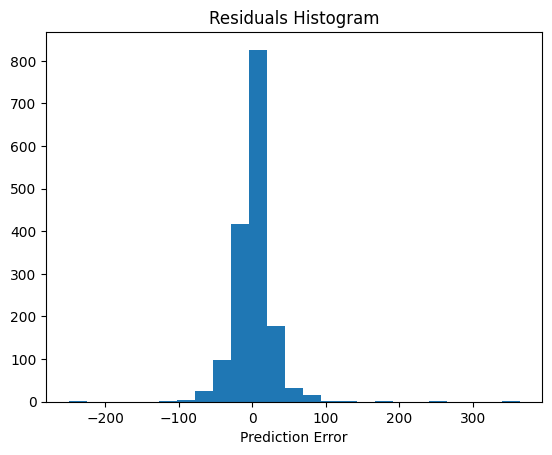

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

nifty_50_df = pd.read_csv("nifty_data.csv")

X = nifty_50_df[['Open', 'High', 'Low', 'Volume']]
y = nifty_50_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = metrics.mean_squared_error(y_test, predictions)
print('MSE:', mse)

rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE:', rmse)

r2 = metrics.r2_score(y_test, predictions)
print('R-squared:', r2)

print('Coefficients:', model.coef_)

predictions = model.predict(X_test)
mse = metrics.mean_squared_error(y_test, predictions)
mae = metrics.mean_absolute_error(y_test, predictions)

print('MSE:', mse)
print('MAE:', mae)
print('Coefficients:', model.coef_)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual vs Predicted Prices")
plt.show()

residuals = y_test - predictions
plt.hist(residuals, bins = 25)
plt.xlabel('Prediction Error')
plt.title("Residuals Histogram")
plt.show()

***Accuracy of Linear Regression***

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Load the dataset
df = pd.read_csv('/NIFTY 50 k.csv')

# Define X and y
X = df[['Open','High','Low','Volume']]
y = df['Close']

X, y = make_classification(n_samples=5000, n_features=20, n_informative=15, n_redundant=5, random_state=3)

model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' %(mean(accuracy), std(accuracy)))

Accuracy: 0.948 (0.009)


***Random Forest***

MSE: 1916.4852222029936
RMSE: 43.777679497696006
R-squared: 0.9998603830644824
Feature Importances:
 [3.05448901e-02 7.63979264e-01 2.05462165e-01 1.36809534e-05]
Mean Absolute Error: 24.65


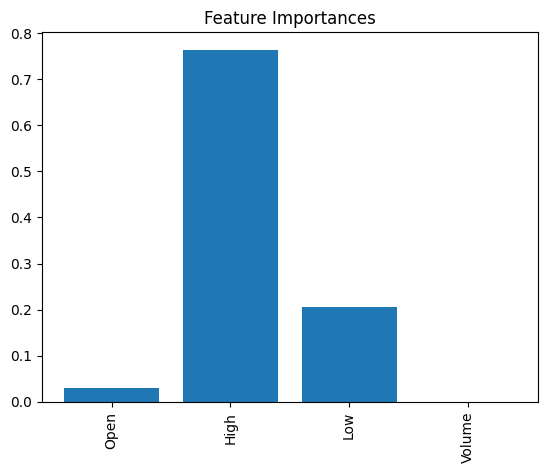

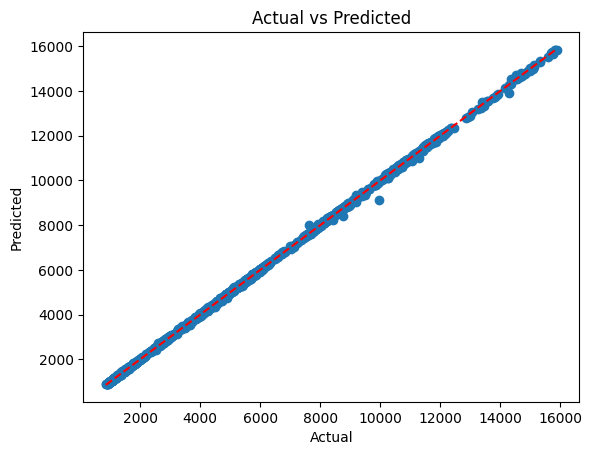

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


nifty_50_df = pd.read_csv('/NIFTY 50 k.csv')

X = nifty_50_df[['Open', 'High', 'Low', 'Volume']]
y = nifty_50_df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)

mse = metrics.mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print("RMSE:", rmse)

r2 = metrics.r2_score(y_test, predictions)
print("R-squared:", r2)

print("Feature Importances:\n", rf_model.feature_importances_)

predictions = rf_model.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))


importances = rf_model.feature_importances_
features = X.columns
plt.bar(range(len(features)), importances)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.title("Feature Importances")
plt.show()

plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual vs Predicted")
plt.show()

***Accuracy of Random Forest***

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Load the dataset
df = pd.read_csv('/NIFTY 50 k.csv')

# Define X and y
X = df[['Open','High','Low','Volume']]
y = df['Close']

X, y = make_classification(n_samples=5000, n_features=20, n_informative=15, n_redundant=5, random_state=3)

model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' %(mean(n_scores), std(n_scores)))


Accuracy: 0.949 (0.009)
